# Data Analysis using Youtube API

In [11]:
#import libraries
from googleapiclient.discovery import build
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from dateutil.parser import parse
import YoutubeAPIFunctions

#NLP
from wordcloud import WordCloud
import nltk

Required here to use a developer API key

In [12]:
#Keys
api_key = 'xyz'
api_service_name = "youtube"
api_version = "v3"

In [13]:
# Channels to analyze 
channel_ids = ['UC2dMML4l3XHrOlPYtsNL_vQ',
                #more channels here
                ]

In [14]:
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [15]:
# Get channel stats
channel_stats = get_channel_stats(youtube, channel_ids)

NameError: name 'get_channel_stats' is not defined

In [16]:
playlist_id = "UU2dMML4l3XHrOlPYtsNL_vQ"

In [17]:
# Get video IDs
video_ids = get_video_ids(youtube, playlist_id)

NameError: name 'get_video_ids' is not defined

In [18]:
# Get video details
video_df = get_video_details(youtube, video_ids)

NameError: name 'get_video_details' is not defined

# Data pre-processing

In [19]:
# change fields to numerical data
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount' , 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

NameError: name 'video_df' is not defined

In [20]:
# published date
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

NameError: name 'video_df' is not defined

In [21]:
# convert duration into seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

NameError: name 'video_df' is not defined

In [22]:
# add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

NameError: name 'video_df' is not defined

# Data analysis

# Best performing videos

In [23]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

NameError: name 'video_df' is not defined

# Worst performing videos

In [24]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

NameError: name 'video_df' is not defined

# View distribution per video

In [25]:
sns.violinplot(x = video_df['channelTitle'], y = video_df['viewCount'])

NameError: name 'video_df' is not defined

# Views vs. likes & comments

NameError: name 'video_df' is not defined

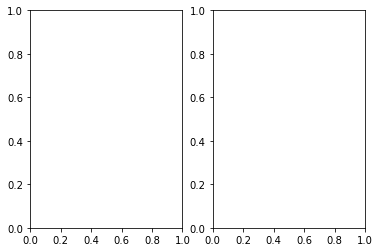

In [26]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

# Video duration

In [27]:
sns.histplot(data = video_df, x = 'durationSecs', bins = 30)

NameError: name 'video_df' is not defined

# Wordcloud for video titles

In [28]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize = (30, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    
wordcloud = WordCloud(width = 2000, height = 1000, random_state =1, background_color = 'black',
                     colormap = 'viridis', collocations = False).generate(all_words_str)
plot_cloud(wordcloud)

NameError: name 'stopwords' is not defined

# Upload schedule

In [29]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x = 'index', y = 'publishDayName', rot = 0)

NameError: name 'video_df' is not defined